# 🎨 BIC in a network?
This Jupyter tries to find a BIC in a network

In [2]:
import matplotlib.pyplot as plt
import numpy as np


from complex_network.components.link import Link
from complex_network.components.node import Node
from complex_network.networks.network import Network
from complex_network.networks import network_factory
from complex_network.networks.network_factory import generate_network
from complex_network.networks.network_spec import NetworkSpec

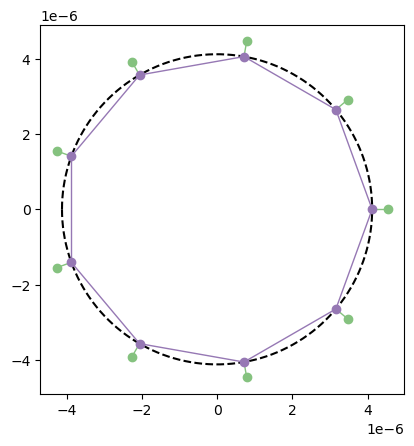

In [3]:
lambda0 = 600e-9  # target wavelength for topological resonance
k0 = 2 * np.pi / lambda0  # target wavenumber for topological resonance
nb = 5  # order number along an edge
num_edge = 9
edge_length = nb * np.pi / k0
r_inscribed = edge_length * 1 / np.tan(np.pi / num_edge)


internal_node_x = r_inscribed * np.cos(
    np.linspace(0, 2 * np.pi, num_edge, endpoint=False)
)
internal_node_y = r_inscribed * np.sin(
    np.linspace(0, 2 * np.pi, num_edge, endpoint=False)
)

external_node_x = (
    1.1
    * r_inscribed
    * np.cos(np.linspace(0, 2 * np.pi, num_edge, endpoint=False))
)
external_node_y = (
    1.1
    * r_inscribed
    * np.sin(np.linspace(0, 2 * np.pi, num_edge, endpoint=False))
)

node_dict = {}
link_dict = {}

for ii in range(num_edge):
    node_dict[num_edge + ii] = Node(
        num_edge + ii, "external", (external_node_x[ii], external_node_y[ii])
    )
    link_dict[num_edge + ii] = Link(
        num_edge + ii, "external", (num_edge + ii, ii)
    )

for ii in range(num_edge):
    node_dict[ii] = Node(
        ii, "internal", (internal_node_x[ii], internal_node_y[ii])
    )
    link_dict[ii] = Link(ii, "internal", (ii, (ii + 1) % num_edge))


spec = NetworkSpec(
    network_type="custom",
    network_shape=None,
    node_dict=node_dict,
    link_dict=link_dict,
    network_size=r_inscribed
)

network = network_factory.generate_network(spec)

network.draw(
    equal_aspect=True,
    highlight_links=[],
    show_external_indices=False,
    show_indices=False,
    highlight_nodes=[],
    draw_boundary=spec.network_size
)

Text(0, 0.5, 'det S')

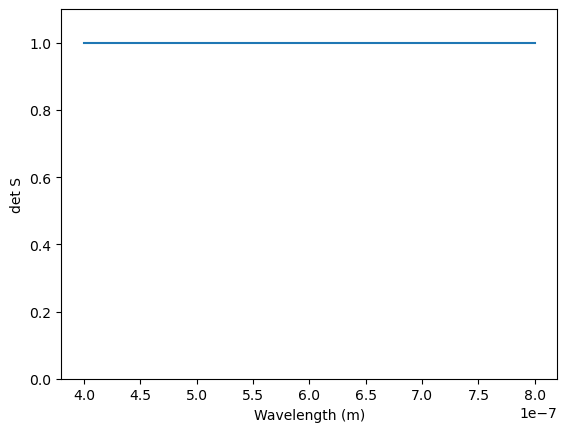

In [4]:
wavelengths = np.linspace(400e-9, 800e-9, 100)
detS = np.zeros((len(wavelengths), 1),dtype=np.complex128)

for jj,wl in enumerate(wavelengths):
    S = network.get_S_ee(2*np.pi/wl)
    detS[jj] = np.linalg.det(S)

# print(np.abs(detS[0]))
plt.figure()
plt.plot(wavelengths, np.abs(detS))
plt.ylim(0,1.1)
# plt.plot([450e-9, 450e-9], [0, 1], 'r.')
# print(np.abs(detS))
plt.xlabel('Wavelength (m)')
plt.ylabel('det S')

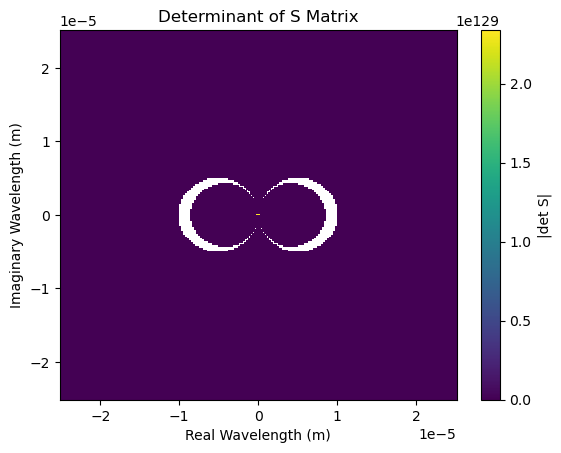

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for the real and imaginary parts of the wavelength
l = 25e-6
real_wavelengths = np.linspace(-l, l, 200)
imag_wavelengths = np.linspace(-l, l, 200)

# Create a meshgrid of complex wavelengths
real_wl, imag_wl = np.meshgrid(real_wavelengths, imag_wavelengths)
complex_wavelengths = real_wl + 1j * imag_wl

# Initialize the array to store the determinant values
detS = np.zeros(complex_wavelengths.shape, dtype=np.complex128)

# Compute the determinant for each complex wavelength
for jj in range(complex_wavelengths.shape[0]):
    for kk in range(complex_wavelengths.shape[1]):
        wl = complex_wavelengths[jj, kk]
        S = network.get_S_ee(2 * np.pi / wl)
        detS[jj, kk] = np.linalg.det(S)

# Plot the results using pcolor
plt.figure()
plt.pcolor(real_wl, imag_wl, np.abs(detS), shading='auto')
plt.colorbar(label='|det S|')
plt.xlabel('Real Wavelength (m)')
plt.ylabel('Imaginary Wavelength (m)')
plt.title('Determinant of S Matrix')
plt.show()
# plt.figure()
# plt.pcolor(real_wl, imag_wl, np.real(detS), shading='auto')
# plt.colorbar(label='|det S|')
# plt.xlabel('Real Wavelength (m)')
# plt.ylabel('Imaginary Wavelength (m)')
# plt.title('Determinant of S Matrix')
# plt.show()

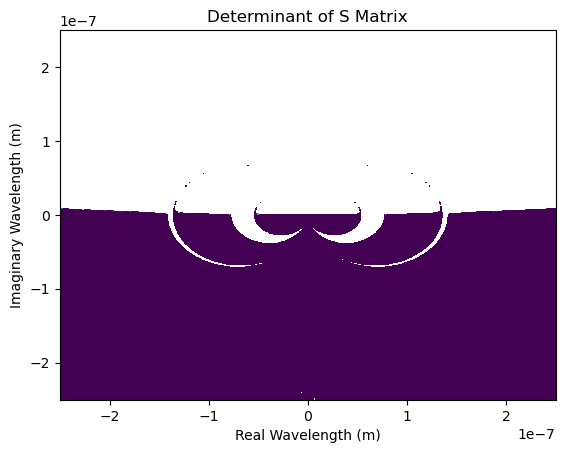

In [22]:

# Define the range for the real and imaginary parts of the wavelength
l = 2.5e-7
real_wavelengths = np.linspace(-l, l, 1000)
imag_wavelengths = np.linspace(-l, l, 1000)

# Suppress overflow warnings
np.seterr(all='ignore')

# Create a meshgrid of complex wavelengths
real_wl, imag_wl = np.meshgrid(real_wavelengths, imag_wavelengths)
complex_wavelengths = real_wl + 1j * imag_wl

# Initialize the array to store the determinant values
detS = np.zeros(complex_wavelengths.shape, dtype=np.complex128)

# Compute the determinant for each complex wavelength
for jj in range(complex_wavelengths.shape[0]):
    for kk in range(complex_wavelengths.shape[1]):
        wl = complex_wavelengths[jj, kk]
        S = network.get_S_ee(2 * np.pi / wl)
        detS[jj, kk] = np.linalg.det(S)

# Plot the results using pcolor
plt.figure()
plt.pcolor(real_wl, imag_wl, np.abs(detS), shading='auto')
# plt.colorbar(label='|det S|')
plt.xlabel('Real Wavelength (m)')
plt.ylabel('Imaginary Wavelength (m)')
plt.title('Determinant of S Matrix')
plt.show()

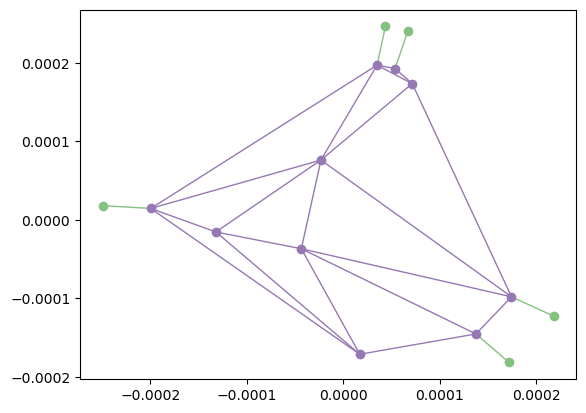

In [8]:
# Define network configuration
network_config = NetworkSpec(
    num_internal_nodes=10,
    num_external_nodes=5,
    network_type="delaunay",
    network_shape="circular",
    network_size=200e-6,
    external_size=250e-6,
    external_offset=0.0,
    random_seed=5
)

network = generate_network(network_config)
network.draw()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp

# Suppress overflow warnings
np.seterr(all='ignore')


# Define the range for the real and imaginary parts of the wavelength
l = 15e-6
real_wavelengths = np.linspace(-l, l, 5000)
imag_wavelengths = np.linspace(-l, l, 5000)

# Create a meshgrid of complex wavelengths
real_wl, imag_wl = np.meshgrid(real_wavelengths, imag_wavelengths)
complex_wavelengths = real_wl + 1j * imag_wl

# Initialize the array to store the determinant values
detS = np.zeros(complex_wavelengths.shape, dtype=np.complex128)

# Define function for multiprocessing
def compute_detS(indices):
    local_detS = np.zeros(len(indices), dtype=np.complex128)
    for i, (jj, kk) in enumerate(indices):
        wl = complex_wavelengths[jj, kk]
        S = network.get_S_ee(2 * np.pi / wl)
        local_detS[i] = np.linalg.det(S)
    return indices, local_detS

# Prepare the indices to process
indices = [(jj, kk) for jj in range(complex_wavelengths.shape[0]) for kk in range(complex_wavelengths.shape[1])]
num_workers = mp.cpu_count()  # Use all available CPU cores
chunked_indices = np.array_split(indices, num_workers)  # Split into chunks

# Run multiprocessing pool
if __name__ == "__main__":
    with mp.Pool(num_workers) as pool:
        results = pool.map(compute_detS, chunked_indices)

    # Collect results
    for indices, values in results:
        for (jj, kk), val in zip(indices, values):
            detS[jj, kk] = val

    # Plot the results using pcolor
    plt.figure()
    plt.pcolor(real_wl, imag_wl, np.abs(detS), shading='auto')
    # plt.colorbar(label='|det S|')
    plt.xlabel('Real Wavelength (m)')
    plt.ylabel('Imaginary Wavelength (m)')
    plt.title('Determinant of S Matrix')
    plt.show()
